# short script to show the geometry of an osmose country

In [1]:
# ! pip install matplotlib

In [2]:
import os
import matplotlib.pyplot as plt
import gzip
import json
import shapely
import shapely.wkt as wkt

# PATH_2_OSMOSE_COUNTRY_CONFIG = "../osm_wikidata_quality_checker/res"
PATH_2_OSMOSE_COUNTRY_CONFIG = "./"
fullpath=os.path.join(PATH_2_OSMOSE_COUNTRY_CONFIG,'osmose_country_wkt.json.gz')
assert os.path.exists(fullpath)

In [5]:
with gzip.open(os.path.join(fullpath), 'rt') as f:
    wkts = json.load(f)

MultiPolygon
number of polygons: 166


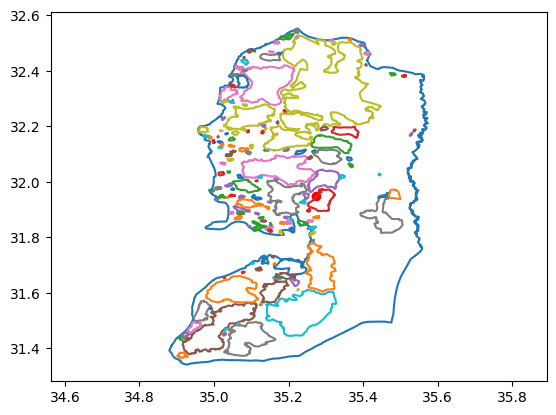

In [17]:
ID_TO_SHOW = 1803010  # Polygon

wkt_ = wkts[str(ID_TO_SHOW)]
geom = wkt.loads(wkt_)
print(geom.geometryType())

print(f"number of polygons: {len(geom.geoms)}")
for poly in geom.geoms:
    x,y = poly.boundary.xy
    plt.plot(x, y)

# optional: point
plt.scatter(*geom.representative_point().xy, color='red') # lon/lat

# make same size
xlim = plt.xlim()
ylim = plt.ylim()
xdif = abs(xlim[0]-xlim[1])
ydif = abs(ylim[0]-ylim[1])
if xdif < ydif:
    mid = (xlim[0] + xlim[1]) / 2 
    plt.xlim([mid-ydif/2, mid+ydif/2])
else:
    mid = (ylim[0] + ylim[1]) / 2 
    plt.ylim([mid-xdif/2, mid+xdif/2])



## Test point inside

In [20]:
point = shapely.geometry.Point(10.5, 48.1) # lon/lat

try:
    point = geom.representative_point()
    print(point.within(geom) or point.touches(geom))
except:
    pass


TopologyException: side location conflict at 35.252544399999998 31.767230000000001. This can occur if the input geometry is invalid.
